# Data Distribution Graphs

In this notebook, we explore the details about the data found for desgining a machine learning algorithm that predicts the nitrogen dioxide (NO2) and ozone (O3) levels in Utrecht. We successfully downloaded the air quality data from **European Environment Agency (EEA)** open database and stored it in the data folder (raw folder). Following, we preprocessed the data by selecting the Utrecht stations (Griftpark, Kardinaal de Jongweg, and Constant Erzeijstraat) and by dropping the unnecessary columns such as the sample process. This way, we focused solely on the air pollutant and its concetration at every hour.

Moreover, the air pollutants found had no correlation between each other, challenging, thereafter the prediction process for NO2 and O3 concentrations. Thus, we have obtained a second data about meteorological features of air quality in Utrecht. In this file, both datasets are inspected to ensure proper data handling for the model.

The file `data_pipeline.py` has to be executed in order for the large data from Airbase to be downloaded. As of this point, the preprocessing file will skip downloading the data since the `eea_data.csv` file already exists in the designated directory (data/raw/). However, should the user want to download the data directly in their computer, then the aforementioned Python file needs to be executed. Notably, the user should check their Internet connection before downloading so as to omit any possible issues.

## Inspecting the raw datasets' details

In the following code, it can be observed some details about the datasets. From the raw EEA dataset, there are some missing values for the 'Concentration' column. This will be handled in the preprocessing phase of the project to minimize the skew of the analysis and to ensure model performance. The meteorological data has two columns that are missing values but, all of these columns are dropped when preprocessing.

In [3]:
import pandas as pd
from pathlib import Path


root = Path().resolve().parent
# get the path to the raw data
raw_eea_path = root / 'data' / 'raw' / 'eea_data.csv'

# read the raw EEA dataset
eea_data = pd.read_csv(raw_eea_path)

print(eea_data.describe())
print(eea_data.info())

# check for missing values
print(eea_data.isnull().sum())

# file = 'utrecht_meteo_2022.csv
#data = pd.read_csv(root / 'data' / 'raw' / file)
#print(data.info())
#print(data.isnull().sum())

       Concentration      Validity  Verification
count   9.828058e+06  1.012456e+07  1.012456e+07
mean    1.531047e+01  9.417605e-01  1.508214e+00
std     2.116569e+01  3.377624e-01  8.707160e-01
min    -2.501000e+01 -1.000000e+00  1.000000e+00
25%     1.240000e+00  1.000000e+00  1.000000e+00
50%     8.000000e+00  1.000000e+00  1.000000e+00
75%     1.970000e+01  1.000000e+00  3.000000e+00
max     1.776000e+03  2.000000e+00  3.000000e+00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10124564 entries, 0 to 10124563
Data columns (total 17 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Countrycode               object 
 1   Namespace                 object 
 2   AirQualityNetwork         object 
 3   AirQualityStation         object 
 4   AirQualityStationEoICode  object 
 5   SamplingPoint             object 
 6   SamplingProcess           object 
 7   Sample                    object 
 8   AirPollutant              object 
 9   AirPolluta

In [4]:
import pandas as pd
from pathlib import Path


root = Path().resolve().parent
# get the path to the raw data
meteo_path = root / 'data' / 'raw' / 'utrecht_meteo.csv'

# read the raw EEA dataset
meteo_data = pd.read_csv(meteo_path)

print(meteo_data.describe())
print(meteo_data.info())

# check for missing values
print(meteo_data.isnull().sum())

          tempmax     tempmin        temp  feelslikemax  feelslikemin  \
count  994.000000  994.000000  994.000000    994.000000    994.000000   
mean    15.701710    8.086821   12.007545     15.210563      6.729879   
std      6.930658    5.476214    5.956250      7.623098      6.625743   
min     -1.300000   -7.400000   -4.300000     -5.500000    -11.700000   
25%     10.400000    4.400000    7.900000     10.400000      1.825000   
50%     15.800000    8.600000   11.950000     15.800000      6.600000   
75%     21.000000   12.600000   16.800000     21.000000     12.600000   
max     35.200000   20.700000   25.800000     33.900000     20.700000   

        feelslike         dew    humidity      precip  precipprob  ...  \
count  994.000000  994.000000  994.000000  994.000000  994.000000  ...   
mean    11.082394    8.123541   79.295473    2.716867   67.907445  ...   
std      6.969105    5.280772   10.203978    5.226356   46.706724  ...   
min     -8.500000  -10.400000   38.300000    0

## Inspecting the processed datasets (EEA and Meteorological)

Below, the code shows the details about the processed EEA dataset and the Meteorological dataset. This part is also important as we updated the code for preprocessing according to the number of missing values in the data.

In [5]:
import pandas as pd
from pathlib import Path

root = Path().resolve().parent

# get the paths to the processed datasets
eea_data_path = root / 'data' / 'processed' / 'processed_eea_data.csv'
utrecht_meteo_path = root / 'data' / 'processed' / 'processed_utrecht_meteo.csv'

# show details about the EEA dataset
eea_data = pd.read_csv(eea_data_path)
print("EEA dataset description and information:")
print(eea_data.info())
print(eea_data.describe())
print("Missing values for each column:")
print(eea_data.isnull().sum())

# show details about the meteorological data
utrecht_meteo = pd.read_csv(utrecht_meteo_path)
print("Meteorological dataset description and information:")
print(utrecht_meteo.info())
print(utrecht_meteo.describe())
print("Missing values for each column:")
print(utrecht_meteo.isnull().sum())

EEA dataset description and information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619077 entries, 0 to 619076
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AirQualityStationEoICode  619077 non-null  object 
 1   AirPollutant              619077 non-null  object 
 2   AveragingTime             619077 non-null  object 
 3   Concentration             619077 non-null  float64
 4   DatetimeBegin             619077 non-null  object 
 5   DatetimeEnd               619077 non-null  object 
dtypes: float64(1), object(5)
memory usage: 28.3+ MB
None
       Concentration
count  619077.000000
mean       12.932295
std        19.520663
min       -25.010000
25%         0.350000
50%         6.300000
75%        14.354600
max       979.790000
Missing values for each column:
AirQualityStationEoICode    0
AirPollutant                0
AveragingTime               0
Concentration               0
Da

The following code generates the heatmap for all air pollutants in the processed EEA dataset. This helps with recognizing what features are important for predicting NO2 and O3 concentration based on their correlation values. 

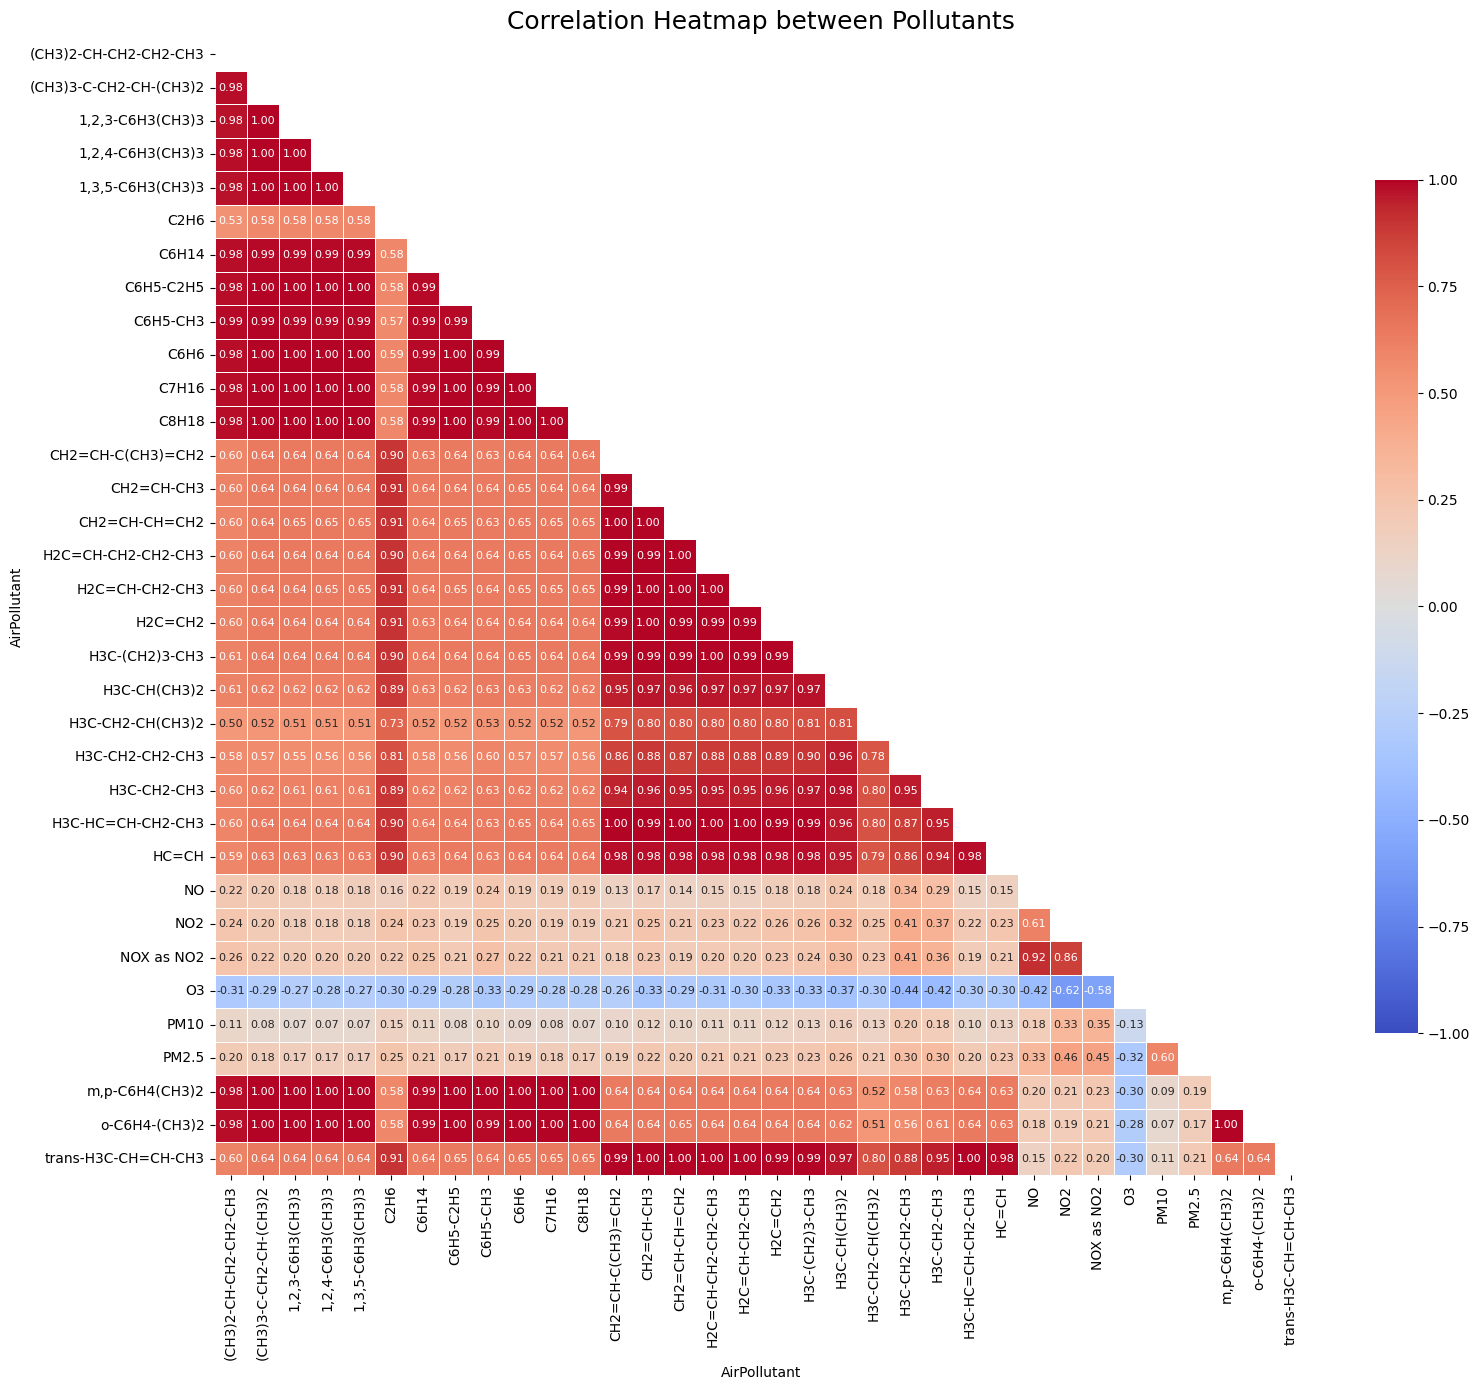

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


pivot_df = eea_data.pivot_table(index='DatetimeBegin', columns='AirPollutant', values='Concentration')

# Compute the correlation matrix
corr_matrix = pivot_df.corr()

# Plot the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap with adjustments for readability
plt.figure(figsize=(16, 14))  # Increase figure size for clarity
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8}, 
            vmin=-1, vmax=1, mask=mask, linewidths=0.5, cbar_kws={"shrink": 0.75})

plt.title('Correlation Heatmap between Pollutants', fontsize=18)
plt.xticks(rotation=90, fontsize=10)  # Rotate x labels for better readability
plt.yticks(fontsize=10)
plt.tight_layout()  # Prevent labels from getting cut off
plt.show()

Since the heatmap is quite extensive, the following code generates the correlation matrix with the highest pollutants that are correlated with NO2 and O3. We set the threshold for high correlation at 0.5. As it can be observed, NO2 is positively correlated with `NOX as NO2` and `NO`, while being negatively correlated with `O3`. On the other hand, O3 is negatively correlated with all the mentioned pollutants.

In [7]:
# drop the self correlation
no2_corr = corr_matrix['NO2'].drop('NO2')
o3_corr = corr_matrix['O3'].drop('O3')

# combine NO2 and O3 correlations into one matrix
combined_corr = pd.DataFrame({'NO2': no2_corr, 'O3': o3_corr})

# threshold for significant correlations
threshold = 0.5

# filter features that are correlated with the targets
significant_features = combined_corr[(combined_corr['NO2'].abs() > threshold) | (combined_corr['O3'].abs() > threshold)]

# sort features by the absolute value of correlation
significant_features = significant_features.reindex(significant_features.abs().max(axis=1).sort_values(ascending=False).index)

print("Top features correlated with NO2 and O3:")
print(significant_features)

Top features correlated with NO2 and O3:
                   NO2        O3
AirPollutant                    
NOX as NO2    0.863015 -0.575059
NO2                NaN -0.623978
O3           -0.623978       NaN
NO            0.613000 -0.421617


The code below shows the correlation matrix between all pollutants in the aggregated data (part of the preprocessing). We decided to aggregate the highly correlated pollutants per day as the original EEA data had concentration values per hour. This decision aligns with the project purpose of predicting the concentrations values per day. Additionally, this method reduces the complexity of the data.

In [27]:
data = pd.read_csv(root / 'data' / 'backups' / 'aggregated_eea_backup.csv')
df_numeric = data.drop(columns=['Date'])
print(df_numeric.corr())

           Avg_NO   Avg_NO2    Avg_O3   Avg_NOX
Avg_NO   1.000000  0.729322 -0.566582  0.663189
Avg_NO2  0.729322  1.000000 -0.664812  0.546804
Avg_O3  -0.566582 -0.664812  1.000000 -0.397003
Avg_NOX  0.663189  0.546804 -0.397003  1.000000


The code below generates the heatmap of the merged data (EEA and Meteorological data) based on the correlation matrix.

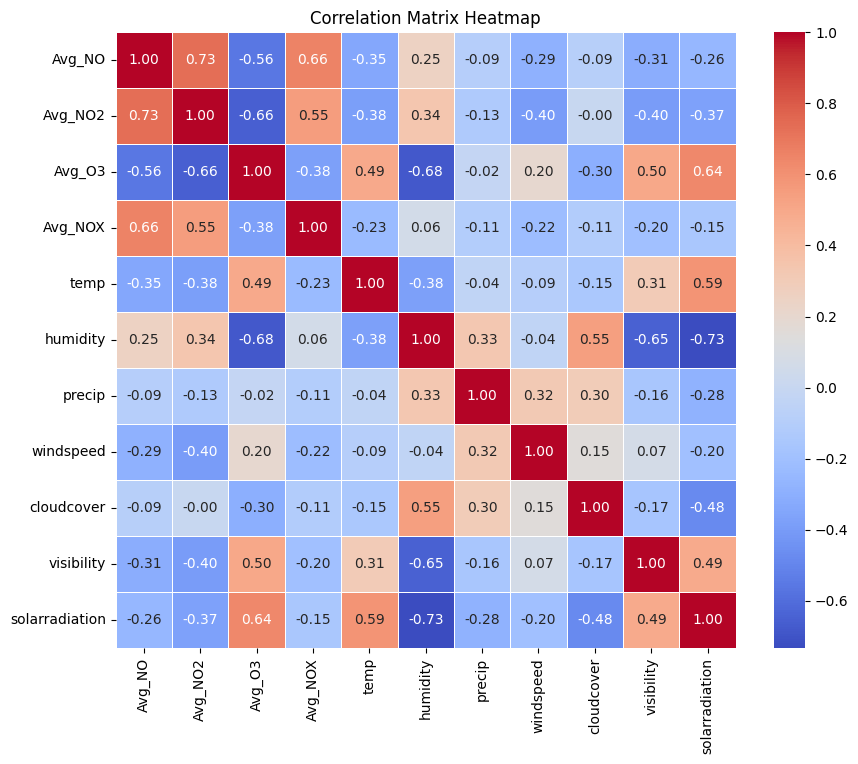

In [65]:
merged_data = pd.read_csv(root / 'data' / 'processed' / 'merged_data.csv')

# correlation matrix
numeric_data = merged_data.drop(columns=['Date'])
correlation_matrix = numeric_data.corr()

# plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

It can be observed below, the distributions for each feature in the data. The `Avg_NO` and `Avg_NOX` are too skewed to the left and **log transformation** is the most suitable to get the data for these features closer to a normal distribution. For normalization, either Standard Scaler or MinMax Sccaler are suitable according to the designed models.

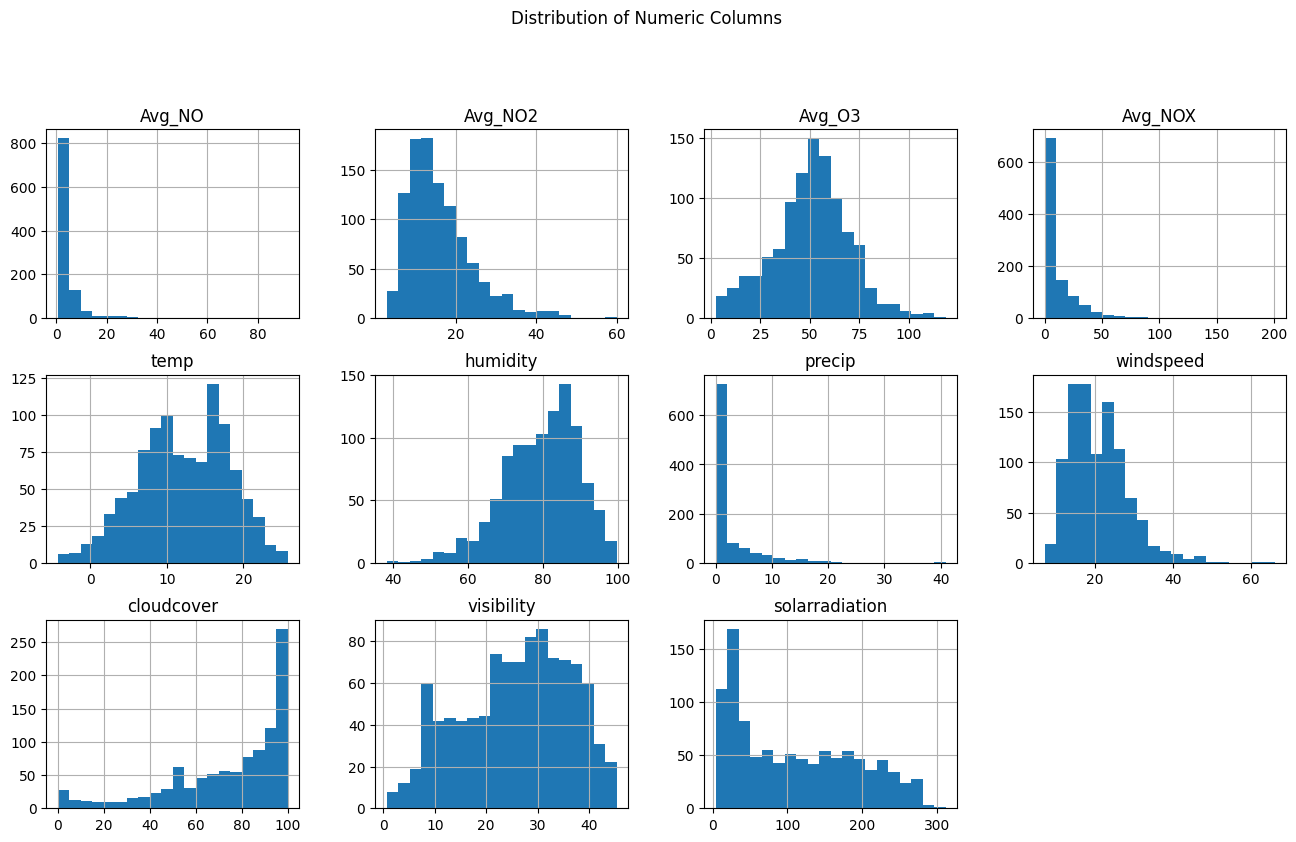

In [66]:
numeric_columns = merged_data.drop(columns=['Date']).select_dtypes(include='float64')

# plot the distribution of each numeric column
numeric_columns.hist(figsize=(16, 12), bins=20, layout=(4, 4))
plt.suptitle("Distribution of Numeric Columns")
plt.show()

The purpose of the code below is to observe the statistics of the data for the NO2 and O3 concentrations. These statistics are the minimum, maximum, median and the description of the concentration values in the data. We can use the 25th and 75th values for both concentrations when adding a label for the inverse relationship between the two targets.

In [60]:
summary_stats = merged_data[['Avg_NO2', 'Avg_O3']].describe()

# Manually compute the percentiles (including median)
min_NO2 = merged_data['Avg_NO2'].min()
max_NO2 = merged_data['Avg_NO2'].max()
median_NO2 = merged_data['Avg_NO2'].median()

min_O3 = merged_data['Avg_O3'].min()
max_O3 = merged_data['Avg_O3'].max()
median_O3 = merged_data['Avg_O3'].median()

# Print the summary
print("Summary statistics for Avg_NO2 and Avg_O3:")
print(summary_stats)

# Print Min, Max, and Median values
print(f"Avg_NO2 - Min: {min_NO2}, Max: {max_NO2}, Median: {median_NO2}")
print(f"Avg_O3 - Min: {min_O3}, Max: {max_O3}, Median: {median_O3}")

Summary statistics for Avg_NO2 and Avg_O3:
           Avg_NO2       Avg_O3
count  1002.000000  1002.000000
mean     16.149605    51.049931
std       8.230319    19.631251
min       2.954167     2.400556
25%      10.233958    39.977917
50%      14.147292    52.447672
75%      20.031840    63.393344
max      59.847361   118.572778
Avg_NO2 - Min: 2.9541666666666666, Max: 59.84736110541667, Median: 14.147291666666668
Avg_O3 - Min: 2.4005555536111114, Max: 118.5727777740278, Median: 52.447672101449264


# Data visualization for the normalized data

It is important to view the data distribution of both **Avg_NO2** and **Avg_O3** to determine whether they are normally distributed or skewed. This helps us understand whether the data requires further preprocessing before splitting the data and feed it to the models.

Below, the code generates the histograms for both NO2 and O3 averaged, and as it can be observed, the data is fairly distributed.

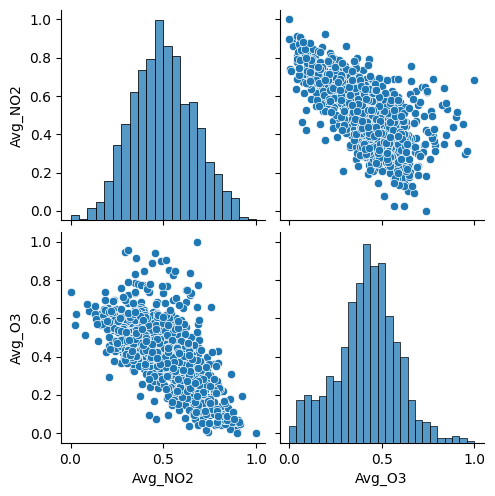

In [53]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

root = Path().resolve().parent
final_data_path = root / 'data' / 'processed' / 'normalized_data.csv'
df = pd.read_csv(final_data_path)

columns_to_plot = ['Avg_NO2', 'Avg_O3']

sns.pairplot(df[columns_to_plot])
plt.show()


The code below generates the time series plot for both NO2 and O3 over a period from 2022 to 2024 September. There are several things to consider from the plot:
1. Both **NO2** and **O3** levels fluctuate significantly over time, with some clear patterns of increase and decrease. This suggests the seasonal variations, for instance the Ozone tends to spike during warmer months due to photochemical reactions.

2. Intriguingly, when **O3** levels rise, **NO2** levels often tend to drop, and vice versa. This inverse relationship could be explained by the fact that NO2 is a precursor to Ozone formation. When NO2 interacts with sunlight, it produces Ozone, reducing the NO2 levels and increasing the Ozone concentration.

3. Over time, both **NO2** and **O3** levels appear to follow consistent cycles. Understanding these patterns could be helpful in predicting pollutant levels in the future.
   
4. The Pearson correlation of **-0.66375** between **Avg_NO2** and **Avg_O3** suggests a moderate to strong negative linear relationship between the two variables. This means that as **NO2** levels increase, **O3** levels tend to decrease, and vice versa. This can also be observed from the graph. 

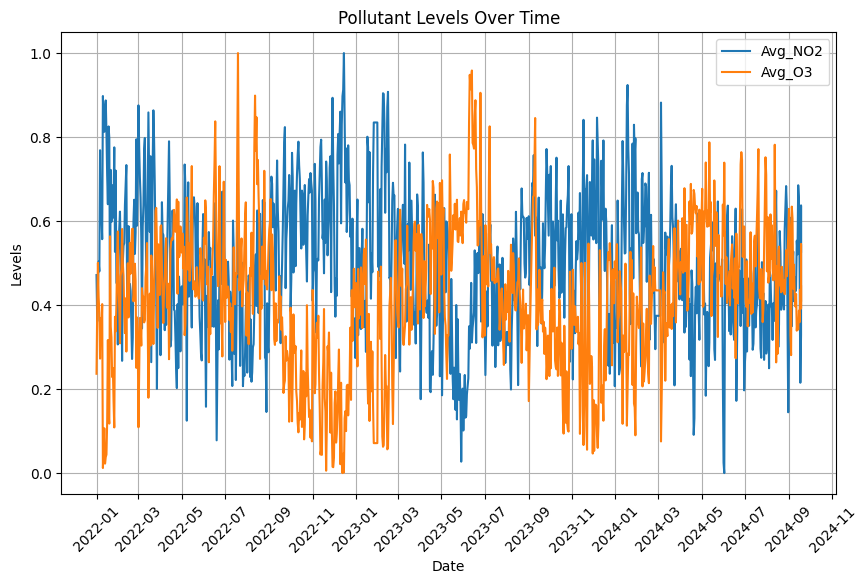

          Avg_NO2    Avg_O3
Avg_NO2  1.000000 -0.652417
Avg_O3  -0.652417  1.000000


In [55]:
import matplotlib.dates as mdates

df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(10, 6))
for column in columns_to_plot:
    plt.plot(df['Date'], df[column], label=column)

plt.title('Pollutant Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Levels')

# print every two months to see the variations better per month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# pearson correlation between the two targets
pearson_corr = df[['Avg_NO2', 'Avg_O3']].corr(method='pearson')
print(pearson_corr)


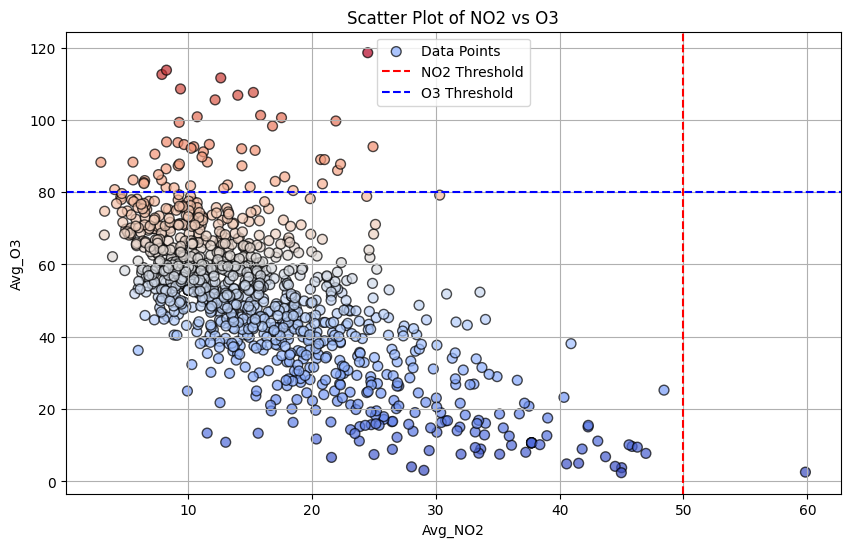

In [57]:
root = Path().resolve().parent
final_data_path = root / 'data' / 'processed' / 'merged_data.csv'
df = pd.read_csv(final_data_path)

plt.figure(figsize=(10, 6))

plt.scatter(df['Avg_NO2'], df['Avg_O3'], alpha=0.7, c=df['Avg_O3'], cmap='coolwarm', label="Data Points", edgecolor='k', s=50)
plt.axvline(x=50, color='red', linestyle='--', label='NO2 Threshold')
plt.axhline(y=80, color='blue', linestyle='--', label='O3 Threshold')

plt.title("Scatter Plot of NO2 vs O3")
plt.xlabel("Avg_NO2")
plt.ylabel("Avg_O3")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
from pathlib import Path
import pandas as pd

root = Path().resolve().parent

train_path = root / 'data' / 'splits' / 'train_data.csv'
test_path = root / 'data' / 'splits' / 'test_data.csv'
val_path = root / 'data' / 'splits' / 'val_data.csv'

train_df = pd.read_csv(train_path, delimiter=',')
test_df = pd.read_csv(test_path, delimiter=',')
val_df = pd.read_csv(val_path, delimiter=',')

print(train_df.shape)
print(test_df.shape)
print(val_df.shape)

(718, 21)
(155, 21)
(154, 21)
